# CEO Score Analysis

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the Data from output files

In [3]:
output_df = pd.read_csv('output_cleaned.csv', index_col=0)
output_df

,CEO,Ticker,Quarter,Year,CEOScore,CEOSpin
0,Ludwig N. Hantson,ALXN,Q1,2017,0.155,0.070
1,Ludwig N. Hantson,ALXN,Q2,2017,0.190,0.097
2,Ludwig N. Hantson,ALXN,Q3,2017,0.156,0.079
3,Ludwig N. Hantson,ALXN,Q4,2017,0.148,0.027
4,Ludwig N. Hantson,ALXN,Q1,2018,0.128,0.070
6,Joseph R. Swedish,ANTM,Q3,2016,0.151,0.047
7,Joseph R. Swedish,ANTM,Q4,2016,0.204,0.106
8,Joseph R. Swedish,ANTM,Q1,2017,0.179,0.101
9,Joseph R. Swedish,ANTM,Q2,2017,0.186,0.115
10,Joseph R. Swedish,ANTM,Q3,2017,0.208,0.144


## Collapse into averages by CEO

In [7]:
#create new df with column of CEOS
ceo_arr = output_df.CEO.unique()
avg_df = pd.DataFrame({'CEO': ceo_arr, 'Ticker': np.zeros(len(ceo_arr)), 'Transcript_Count' : np.zeros(len(ceo_arr)), 
                       'CEO_Pos': np.zeros(len(ceo_arr)), 'CEO_Spin': np.zeros(len(ceo_arr)), 'Sector': np.zeros(len(ceo_arr)),
                      'Company Name': np.zeros(len(ceo_arr))})

#loop through the dataframe to get each average
max_standdev_pos = 0
max_standdev_spin = 0
for ceo in ceo_arr:
    temp_df = output_df[output_df.CEO == ceo]
    
    trans_num = len(temp_df)
    avg_df.loc[avg_df.CEO == ceo, 'Transcript_Count'] = trans_num

    avg_df.loc[avg_df.CEO == ceo, 'Ticker'] = temp_df.iloc[0]['Ticker']
    
    pos_sum = temp_df.CEOScore.sum()
    avg_df.loc[avg_df.CEO == ceo, 'CEO_Pos'] = pos_sum / trans_num
    
    spin_sum = temp_df.CEOSpin.sum()
    avg_df.loc[avg_df.CEO == ceo, 'CEO_Spin'] = spin_sum / trans_num
    
    #calculate standard deviation, if we have more than 6 transcripts
    if trans_num >= 6:
        std_pos = temp_df.CEOScore.std()
        if std_pos > max_standdev_pos:
            max_standdev_pos = std_pos
        std_spin = temp_df.CEOSpin.std()
        if std_spin > max_standdev_spin:
            max_standdev_spin = std_spin
print("Maximum Stddev of Positivity %.3f" %max_standdev_pos)
print("Maximum Stddev of Spin %.3f" %max_standdev_spin)
avg_df
    

Maximum Stddev of Positivity 0.084
Maximum Stddev of Spin 0.136


,CEO,CEO_Pos,CEO_Spin,Company Name,Sector,Ticker,Transcript_Count
0,Ludwig N. Hantson,0.155400,0.068600,0.0,0.0,ALXN,5.0
1,Joseph R. Swedish,0.185600,0.102600,0.0,0.0,ANTM,5.0
2,Steve Ells,0.147400,0.040000,0.0,0.0,CMG,5.0
3,Sergio Marchionne,0.106286,-0.012429,0.0,0.0,FCAU,7.0
4,James Hackett,0.148667,0.027667,0.0,0.0,F,3.0
5,Mary T. Barra,0.170500,0.038000,0.0,0.0,GM,6.0
6,Robert F. Moran,0.128250,-0.017500,0.0,0.0,GNC,4.0
7,Kathryn V. Marinello,0.174167,0.077833,0.0,0.0,HTZ,6.0
8,Mark Pruzanski,0.145500,0.047167,0.0,0.0,ICPT,6.0
9,Mark Allin,0.116500,-0.050500,0.0,0.0,JWA,2.0


## Add Additional Financial Information

In [26]:
# read in transcipt organization file
info_df = pd.read_excel('transcript_organization.xlsx')
info_df

,CEO_Name,Company_Name,Ticker,GICS_Sector,TXT File?,Number of Transcripts
0,Joseph Bellanoff,Corcept,CORT,Healthcare,Yes,8
1,Sergio Marchionne,Fiat Chrysler,FCAU,Consumer Cyclical,Yes,8
2,Mary T. Barra,General Moters,GM,Consumer Cyclical,Yes,8
3,Mark Pruzanski,Intercept Pharmaceuticals Inc,ICPT,Healthcare,Yes,8
4,Carl S. Rubin,Michaels Company,MIK,Consumer Cyclical,Yes,8
5,Dawn M. Zier,Nutrisystem,NTRI,Consumer Cyclical,Yes,8
6,John McLaughlin,PDL Biopharma Inc,PDLI,Healthcare,Yes,8
7,Alfred P. West,SEI Investments Co,SEIC,Financial Services,Yes,8
8,Christopher M. Carrington,ServiceSource International Corp,SREV,Technology,Yes,8
9,Elon R. Musk,Tesla,TSLA,Consumer Cyclical,Yes,8


In [28]:
# add each of the Sectors to the DF
for ceo in ceo_arr:

    avg_df.loc[avg_df.CEO == ceo, 'Sector'] = info_df.loc[info_df.CEO_Name == ceo, 'GICS_Sector'].values[0]
    avg_df.loc[avg_df.CEO == ceo, 'Company Name'] = info_df.loc[info_df.CEO_Name == ceo, 'Company_Name'].values[0]

avg_df

,CEO,CEO_Pos,CEO_Spin,Company Name,Sector,Ticker,Transcript_Count
0,Ludwig N. Hantson,0.155400,0.068600,Alexian,Healthcare,ALXN,5.0
1,Joseph R. Swedish,0.185600,0.102600,Anthem Inc,Healthcare,ANTM,5.0
2,Steve Ells,0.147400,0.040000,Chipotle Mexican Group,Consumer Cyclical,CMG,5.0
3,Sergio Marchionne,0.106286,-0.012429,Fiat Chrysler,Consumer Cyclical,FCAU,7.0
4,James Hackett,0.148667,0.027667,Ford Motor Co.,Consumer Cyclical,F,3.0
5,Mary T. Barra,0.170500,0.038000,General Moters,Consumer Cyclical,GM,6.0
6,Robert F. Moran,0.128250,-0.017500,GNC Holdings Co.,Consumer Defensive,GNC,4.0
7,Kathryn V. Marinello,0.174167,0.077833,Hertz,Industrials,HTZ,6.0
8,Mark Pruzanski,0.145500,0.047167,Intercept Pharmaceuticals Inc,Healthcare,ICPT,6.0
9,Mark Allin,0.116500,-0.050500,John Whiley and Sons,Consumer Cyclical,JWA,2.0


## Data Description and Visualization

### CEO Positivity by CEO

Summary Statistics
----------------------------------------------------------------------------------------------------
count    30.000000
mean      0.159491
std       0.025561
min       0.106286
25%       0.145975
50%       0.157714
75%       0.171250
max       0.230333
Name: CEO_Pos, dtype: float64
----------------------------------------------------------------------------------------------------


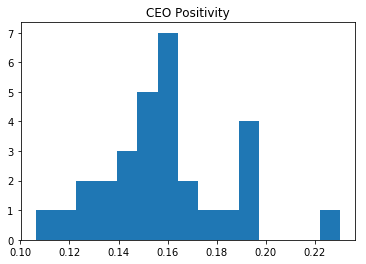

In [4]:
print("Summary Statistics")
print("-"*100)
print(avg_df.CEO_Pos.describe())
print("-"*100)
plt.hist(avg_df.CEO_Pos, bins=15)
plt.title("CEO Positivity")
plt.show()

### CEO Positivity by Transcript

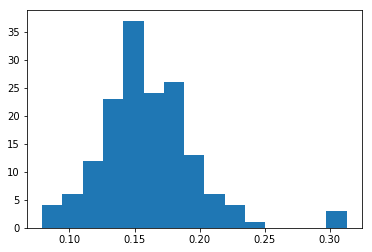

In [40]:
plt.hist(output_df.CEOScore, bins=15)
plt.show()

### CEO Spin

Summary Statistics
----------------------------------------------------------------------------------------------------
count    30.000000
mean      0.042125
std       0.045219
min      -0.050500
25%       0.019062
50%       0.039500
75%       0.066325
max       0.192833
Name: CEO_Spin, dtype: float64
----------------------------------------------------------------------------------------------------


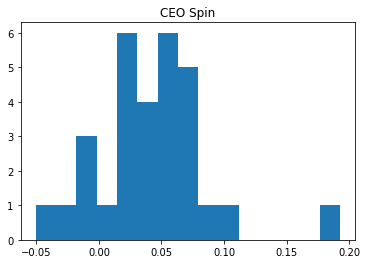

Negative Spin CEO's
----------------------------------------------------------------------------------------------------


,CEO,CEO_Pos,CEO_Spin,Company Name,Sector,Ticker,Transcript_Count
3,Sergio Marchionne,0.106286,-0.012429,Fiat Chrysler,Consumer Cyclical,FCAU,7.0
6,Robert F. Moran,0.128250,-0.017500,GNC Holdings Co.,Consumer Defensive,GNC,4.0
9,Mark Allin,0.116500,-0.050500,John Whiley and Sons,Consumer Cyclical,JWA,2.0
11,John A. Bryant,0.137750,-0.019000,Kellog Co.,Consumer Defensive,K,4.0
15,Jim Herbert,0.138500,-0.009500,Neogen Corp,Healthcare,NEOG,2.0


In [29]:
print("Summary Statistics")
print("-"*100)
print(avg_df.CEO_Spin.describe())
print("-"*100)
plt.hist(avg_df.CEO_Spin, bins=15)
plt.title("CEO Spin")
plt.show()

print("Negative Spin CEO's")
print("-"*100)
avg_df[avg_df['CEO_Spin'] < 0]

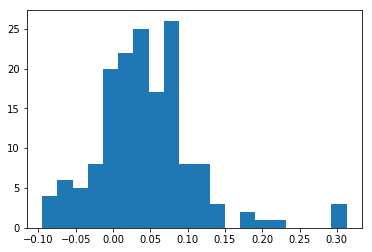

In [41]:
plt.hist(output_df.CEOSpin, bins=20)
plt.show()

### Sector Diversity

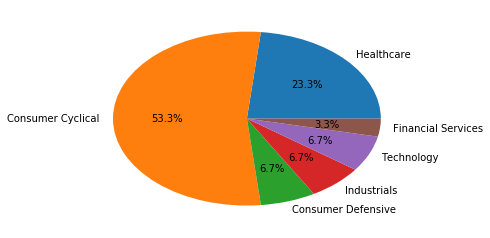

In [36]:
sector_arr = avg_df.Sector.unique()
count_arr = np.zeros(len(sector_arr))
for i in range(0, len(sector_arr)):
    count_arr[i] = len(avg_df[avg_df.Sector == sector_arr[i]])
plt.pie(count_arr, labels=sector_arr, autopct='%1.1f%%')
plt.show()